In [3]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('default')

import matplotlib as mpl
from highlight_text import fig_text
mpl.rcParams['figure.dpi'] = 300

body_font = "Open Sans"
watermark_font = "DejaVu Sans"
text_color = "w"
background = "#282B2F"
title_font = "DejaVu Sans"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['text.color'] = text_color
mpl.rcParams['axes.edgecolor'] = text_color
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6

# Time decay

In [4]:
step_func = np.ones(600)
step_func[100:200] -= 100/600
step_func[200:300] -= 200/600
step_func[300:400] -= 300/600
step_func[400:500] -= 400/600
step_func[500:] -= 500/600

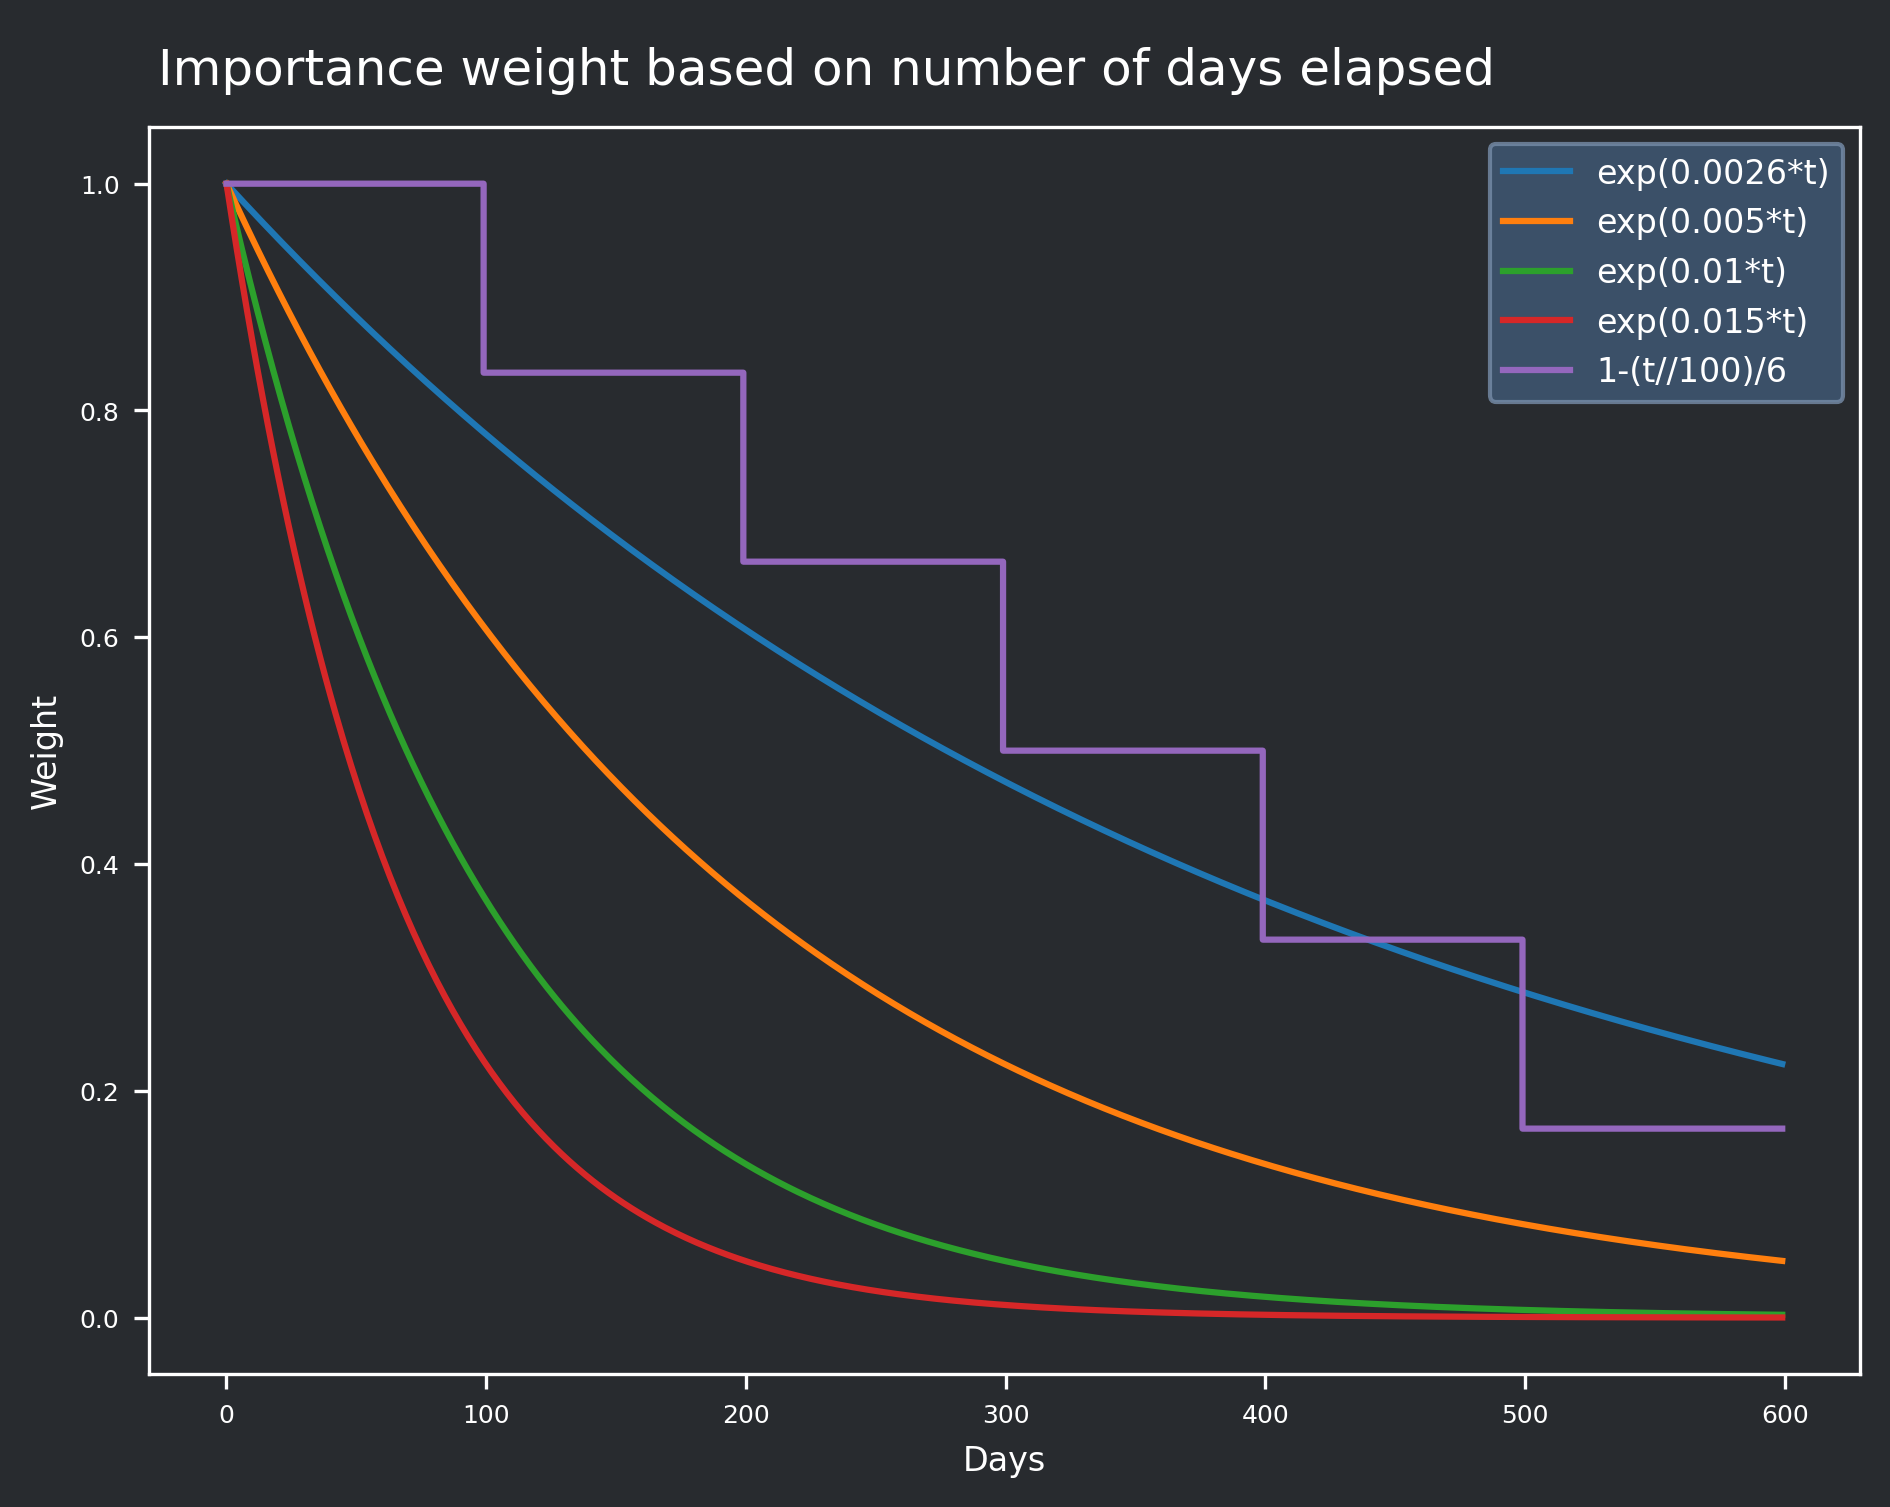

In [5]:
def time_decay(xi, t):
    """ Compute importance weight based on time elapsed

    Args:
        xi (float): Decay rate
        t (int): Days elapsed

    Returns:
        (float): importance weight
    """
    return np.exp(-xi * t)

fig, ax = plt.subplots(1, 1, tight_layout=True)
fig.set_facecolor(background)
ax.patch.set_alpha(0)

plt.plot(np.arange(600), time_decay(0.0025, np.arange(600)), label='exp(0.0026*t)')
plt.plot(np.arange(600), time_decay(0.005, np.arange(600)), label='exp(0.005*t)')
plt.plot(np.arange(600), time_decay(0.01, np.arange(600)), label='exp(0.01*t)')
plt.plot(np.arange(600), time_decay(0.015, np.arange(600)), label='exp(0.015*t)')

plt.step(np.arange(600), step_func, label='1-(t//100)/6')

ax.set_xlabel('Days', fontsize=8, color=text_color)
ax.set_ylabel('Weight' , fontsize=8, color=text_color)

legend = ax.legend(prop={'size': 8}, frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('#415A77')
frame.set_edgecolor('#778DA9')

fig_text(
    x=0.09, y=1.025,
    s="Importance weight based on number of days elapsed",
    fontsize=12, fontfamily=title_font, color=text_color, alpha=1)

plt.show()

## ELO

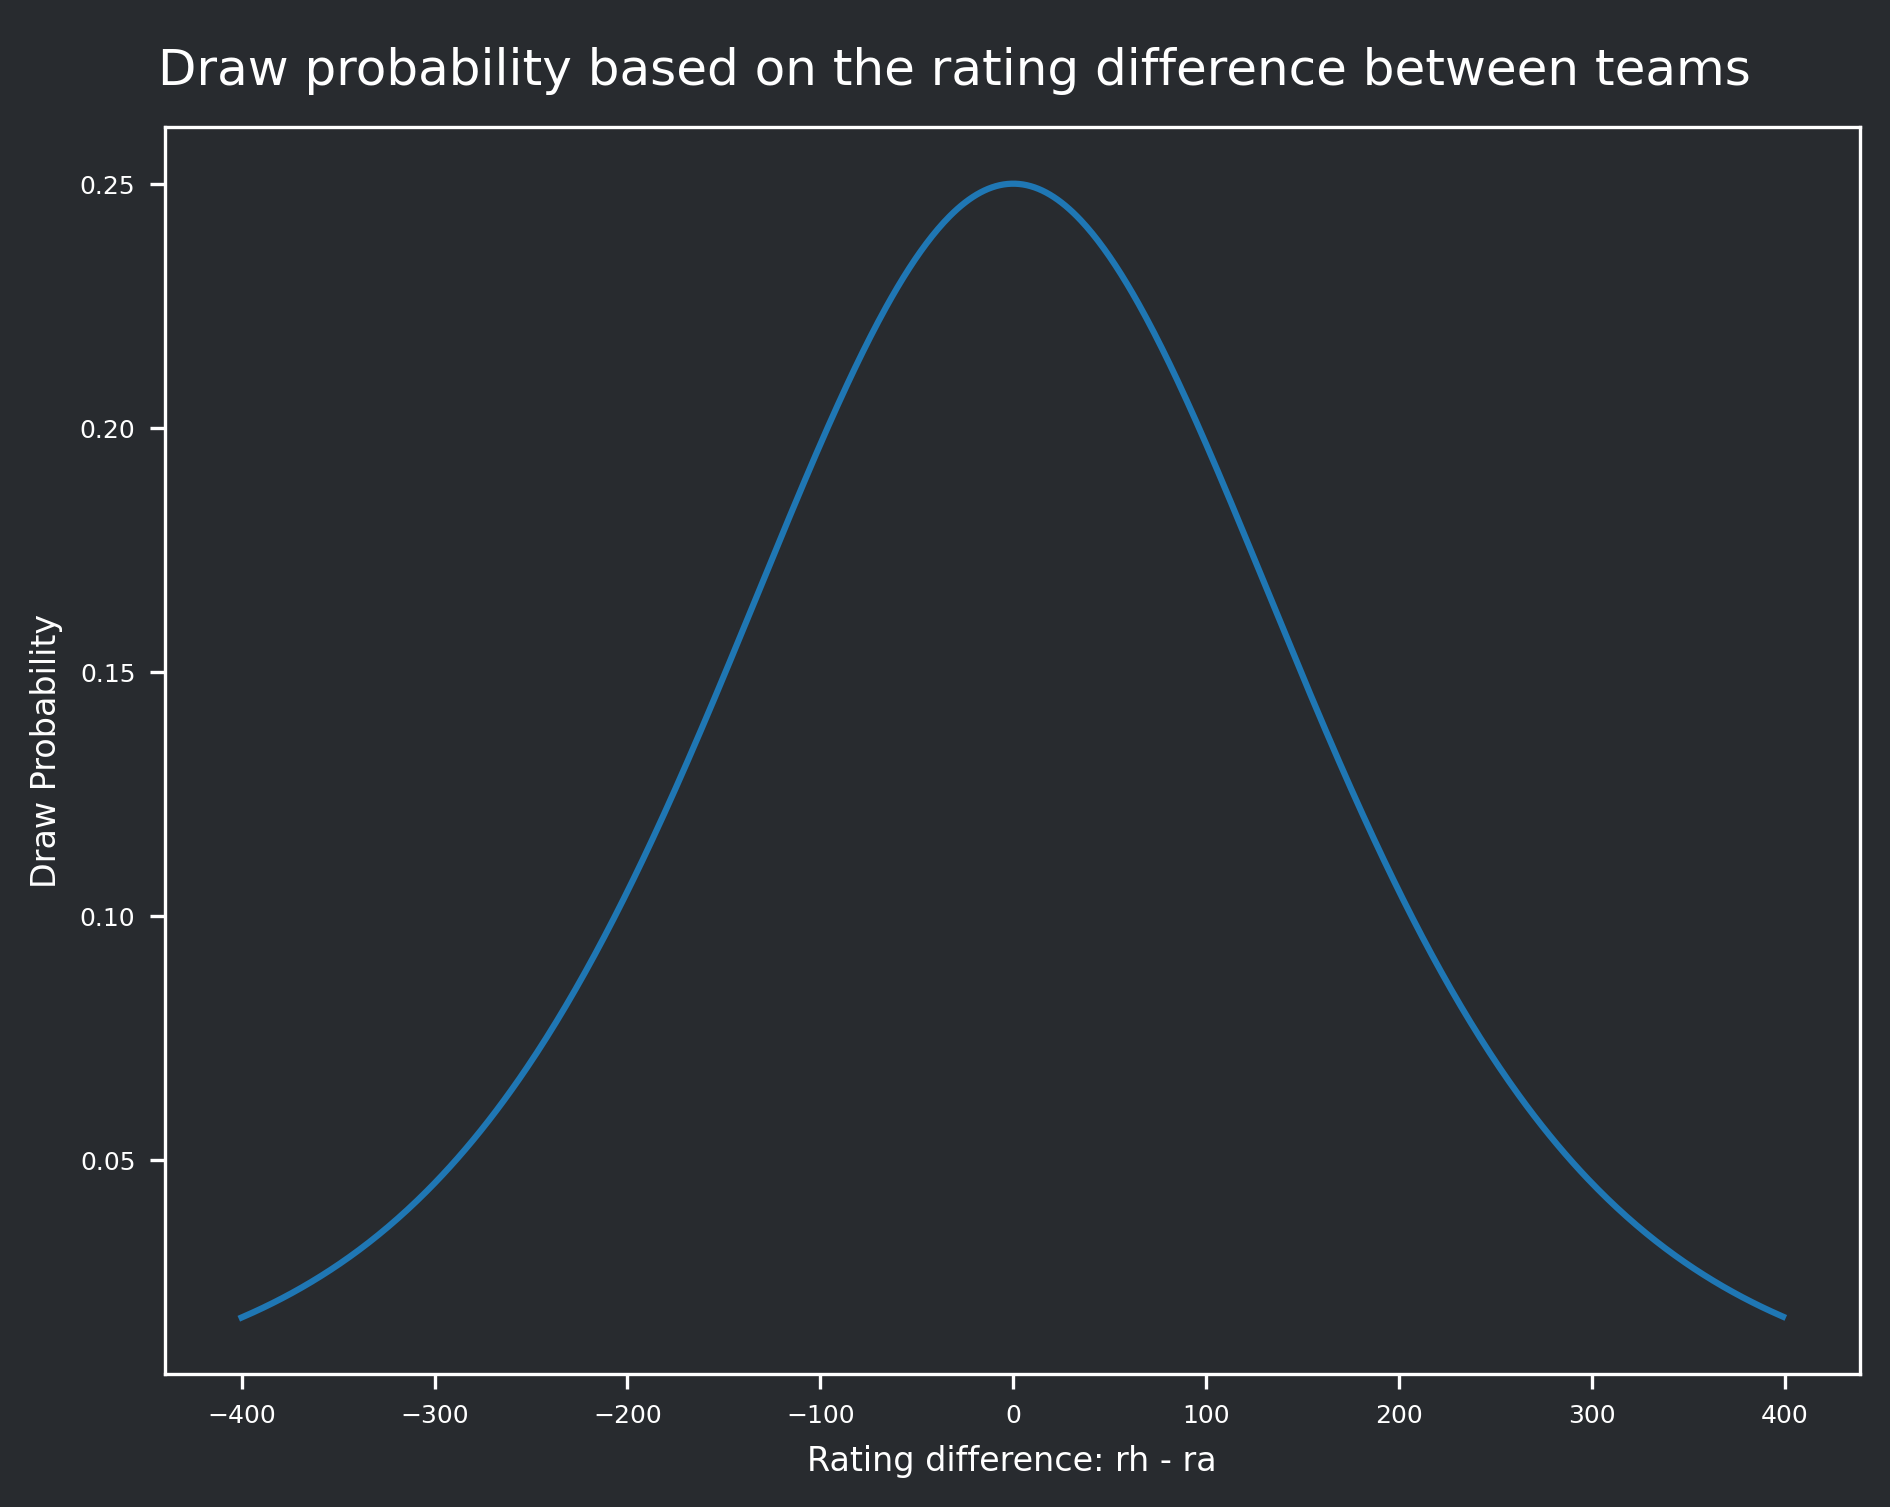

In [6]:
def hubbert(t):
    return np.exp(t / 100) / np.power(1 + np.exp(t / 100), 2)

fig, ax = plt.subplots(1, 1, tight_layout=True)
fig.set_facecolor(background)
ax.patch.set_alpha(0)

plt.plot(np.arange(800)-400, hubbert(np.arange(800)-400), label='exp(0.015*t)')

ax.set_xlabel('Rating difference: rh - ra', fontsize=8, color=text_color)
ax.set_ylabel('Draw Probability' , fontsize=8, color=text_color)

fig_text(
    x=0.09, y=1.025,
    s="Draw probability based on the rating difference between teams",
    fontsize=12, fontfamily=title_font, color=text_color, alpha=1)

plt.show()

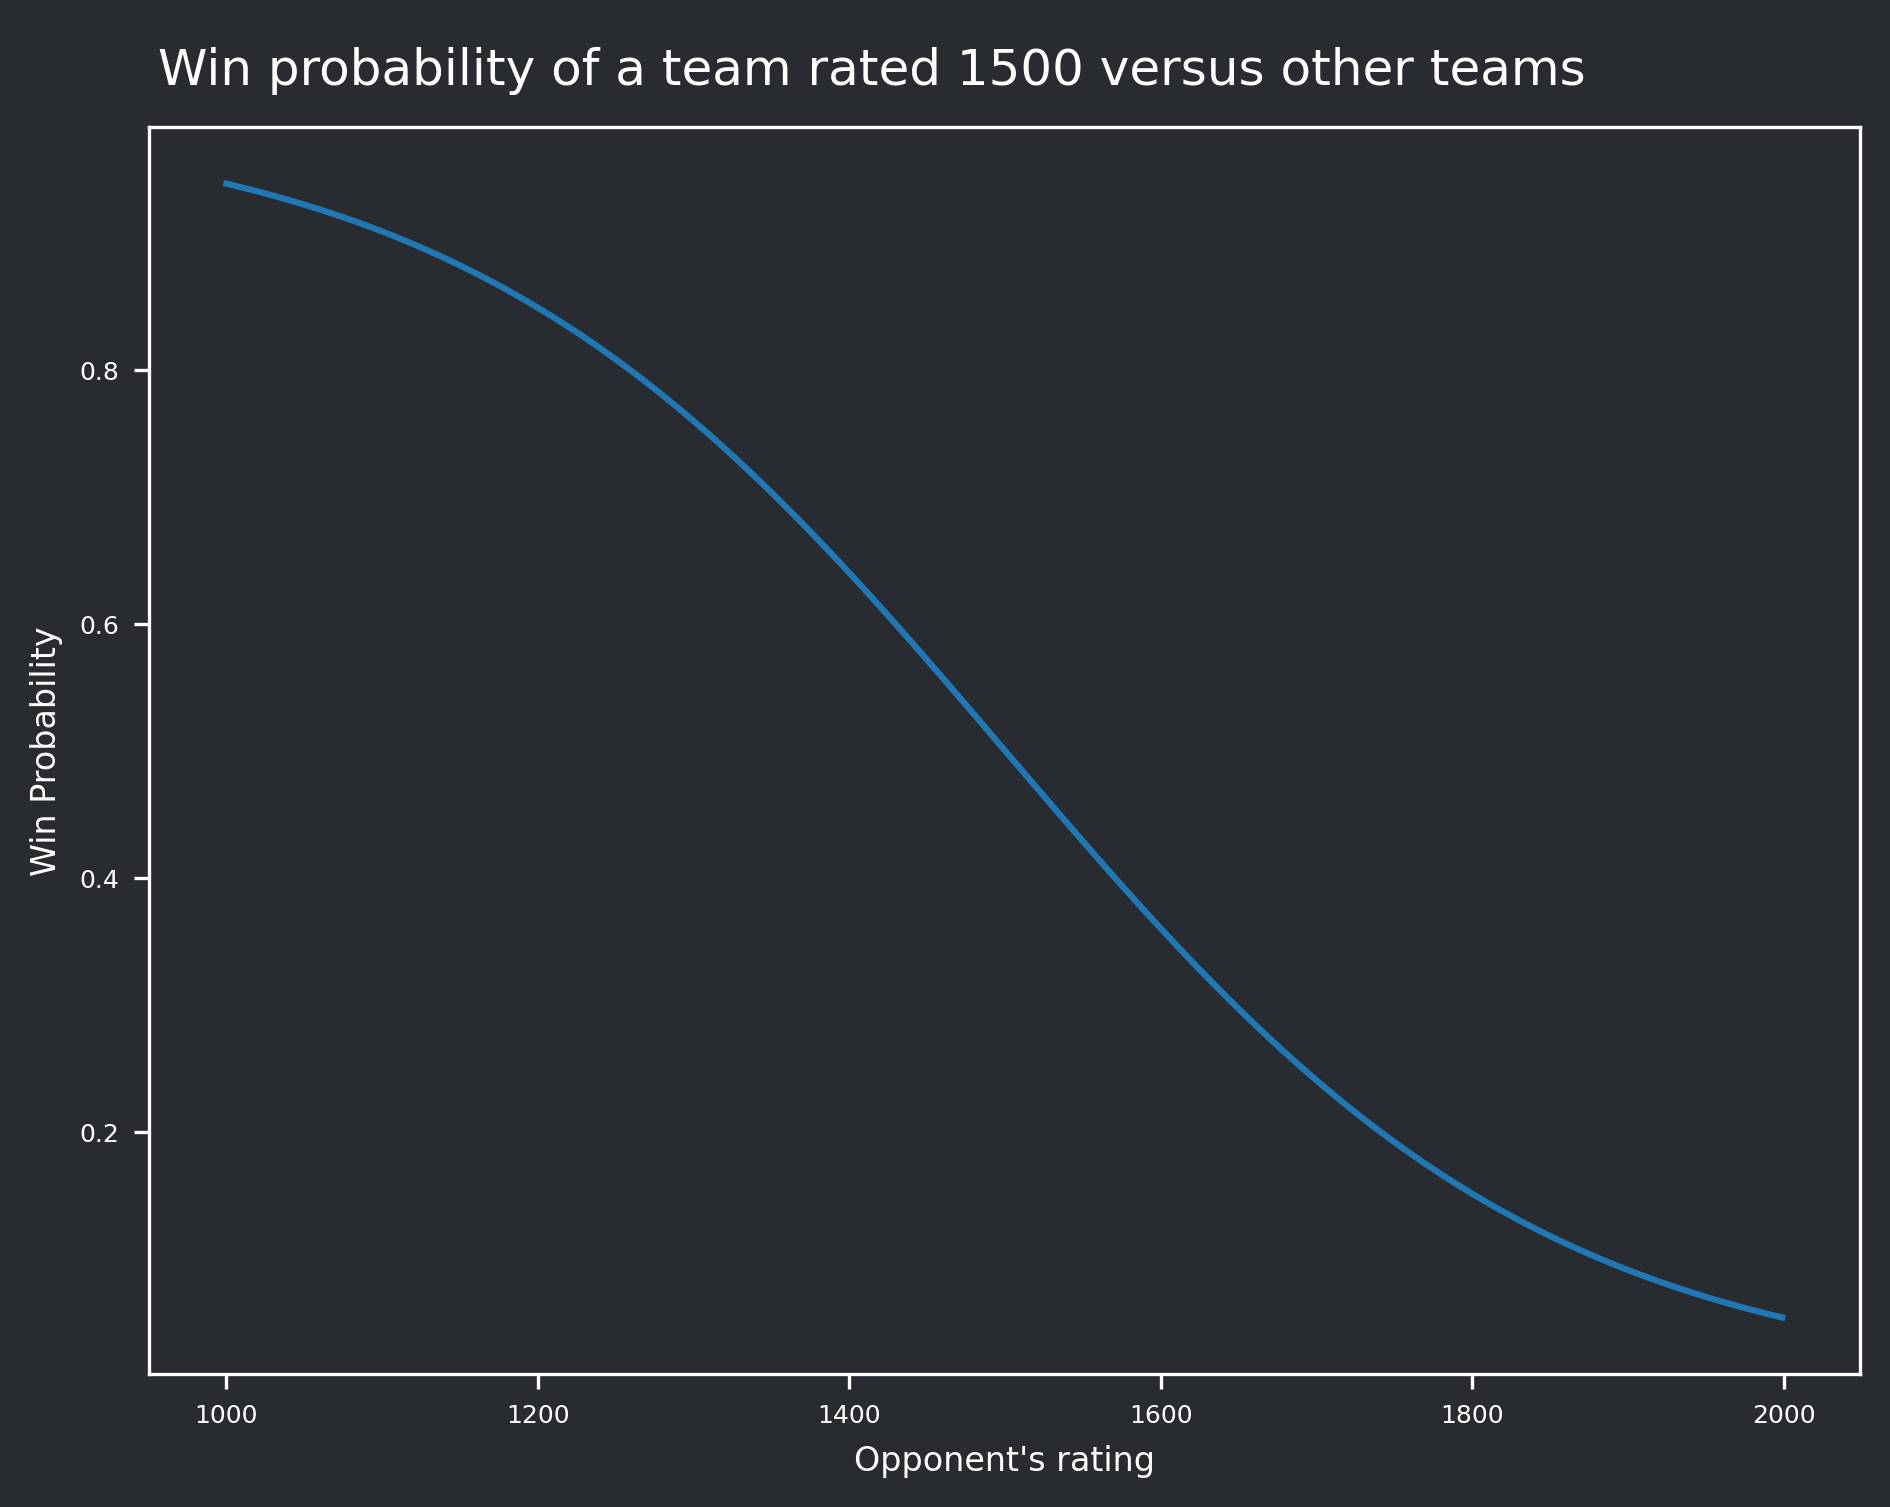

In [7]:
def odds(rating_b, w=400):
    return 1 / (1 + pow(10, (rating_b - 1500) / w))

fig, ax = plt.subplots(1, 1, tight_layout=True)
fig.set_facecolor(background)
ax.patch.set_alpha(0)

plt.plot(np.arange(1000)+1000, odds(np.arange(1000)+1000))

ax.set_xlabel('Opponent\'s rating', fontsize=8, color=text_color)
ax.set_ylabel('Win Probability' , fontsize=8, color=text_color)

fig_text(
    x=0.09, y=1.025,
    s="Win probability of a team rated 1500 versus other teams",
    fontsize=12, fontfamily=title_font, color=text_color, alpha=1)

plt.show()